<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Corte_de_varillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Corte de las varilla**

#1. Descripcion del problema

El problema del corte de la varilla se basa en lo siguiente, si se tiene una varilla un cierto largo, y se tiene una lista de precios con valores para ciertos largo de la varilla, cual seria el orden de los cortes optimos para maximizar el valor de la varilla.

**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

#2. Descripcion del algoritmo

En este informe se van a implementar dos algoritmos los cuales van a resolver el problema, estos algortimos implementan dos ideas de diseño diferentes, uno implementara la **programacion dinamica** mientras que el otro un metodo **recursivo**

* **programacion dinamica:** la programacion dinamica es un *estilo de diseño* similar al **divide y venceras**, de divir el **problema en sub-problemas** mas pequeños para luego con las soluciones de los sub-problemas resolver el problema original, solo que en este caso mantenemos un **listado de resultados obtenidos**, para asi no tener que volver a resolver un problema ya resuelto


In [17]:
def cutRodBottomUp(p,n,verbose = False):
  particion = [0] * n
  global subProblemas
  global indice 
  
  subProblemas = 0
  if n == 0:
    if verbose:
      print("la varilla es de largo 0, asi que")
    return 0,subProblemas

  for j in range(0,n):
    if verbose:
      print("analizando la varilla de largo: ",j+1)
    value = float("-inf")
    preValue = 0
    for i in(1,j):
      subProblemas += 1
      preValue = value
      value = max(value, p[i] + particion[j-i-1])
      if value != preValue:
        indice = j
    if verbose and value == (p[i] + particion[j-i-1]):
        print("el maximo valor encontrado para la varilla de largo ",j+1," es: ",value,"\n")
    particion[j] = value

  return value,subProblemas

p = cutrod_instance_generator(10)
print("longitud de la varilla: ",10)
print("lista de precios: ",p,"\n")
value,c = cutRodBottomUp(p,10)
print("mayor valor de cortes: ",value)

longitud de la varilla:  10
lista de precios:  [1, 5, 12, 14, 20, 21, 22, 23, 28, 37] 

mayor valor de cortes:  37


Cabe resaltar que esta implementacion de **programacion dinamica** no es la unica forma de resolver este problema, tambien se puede resolver de manera **recursiva**, las diferencias entre ambas implementacion las veremos mas adelante.

In [12]:
recursiones = 0
indice = 0

def cutRodRecursive(p,n,verbose = False):
  global recursiones
  global indice

  if n == 0:
    return 0
  
  aux = float("-inf")

  for i in range(0,n):
    aux2 = aux
    aux = max(aux,p[i] + cutRodRecursive(p,n-i-1))
    if aux != aux2:
      indice = i
    recursiones += 1
    if verbose:
      print("el valor maximo encontrado para la varilla de largo ",i+1," es: ",aux)

  return aux

p = cutrod_instance_generator(10)
print("longitud de la varilla: ",10)
print("lista de precios: ",p)
value,c = cutRodBottomUp(p,10)
print("mayor valor de cortes: ",value)

longitud de la varilla:  10
lista de precios:  [3, 11, 16, 26, 30, 37, 45, 49, 49, 56]
mayor valor de cortes:  60


##2.1. Ejecucion del verbose

A continuación, hay otra ejecución del código **bottom up** esta vez mostrando el paso a paso de este, esta opción se habilita cuando $verbose = True$.

In [18]:
p = cutrod_instance_generator(10)
print("longitud de la varilla: ",10)
print("lista de precios: ",p,"\n")
value,c = cutRodBottomUp(p,10,True)
print("mayor valor de cortes: ",value)

longitud de la varilla:  10
lista de precios:  [2, 4, 8, 10, 14, 23, 24, 32, 38, 47] 

analizando la varilla de largo:  1
analizando la varilla de largo:  2
el maximo valor encontrado para la varilla de largo  2  es:  4 

analizando la varilla de largo:  3
el maximo valor encontrado para la varilla de largo  3  es:  8 

analizando la varilla de largo:  4
el maximo valor encontrado para la varilla de largo  4  es:  10 

analizando la varilla de largo:  5
el maximo valor encontrado para la varilla de largo  5  es:  14 

analizando la varilla de largo:  6
el maximo valor encontrado para la varilla de largo  6  es:  23 

analizando la varilla de largo:  7
el maximo valor encontrado para la varilla de largo  7  es:  24 

analizando la varilla de largo:  8
el maximo valor encontrado para la varilla de largo  8  es:  32 

analizando la varilla de largo:  9
el maximo valor encontrado para la varilla de largo  9  es:  38 

analizando la varilla de largo:  10
el maximo valor encontrado para la v

#3 Tiempo de ejecucción

La siguiente función nos entrega que la cantidad de subproblemas que se deben resolver para una entrada de $n$ datos.

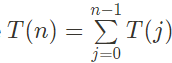

Esta ecuación nos entrega que se necesita resolver $2^n$ subproblemas para una entrada de datos de tamaño $n$.

El tiempo de ejecucción para el algoritmo completo es de $O(n^2)$ debido a la necesidad de tener dos ciclos $for$ anidados para poder utilizar el metodo $bottom-up$ del algoritmo. El tiempo de ejecucción de los subproblemas, al únicamente estarse recorriendo y comparando valores tienen el valor de $O(n)$. Por último, la complejidad espacial del algoritmo es de $O(n)$, debido a que debe almacenar $n$ datos extras que son los valores máximos de cada longitud.

#4 Correctitud

Caso base:
Cuando n = 0, ya se encuentra el valor máximo del beneficio posible, ya que este valor siempre es el mismo (0)

Mantención: Luego de una n-ésima iteración, dentro del segundo for el algoritmo verifica y almacena en caso de que el valor sea mayor al máximo anterior, por lo que luego de la iteración, puede asegurarse que se guarda el máximo precio hasta el momento.

#5. Experimentos

A continuacion se realizara una serie de experimentos para comparar el rendimiento de la implementacion **dinaminca bottom up** y la implementacion **recursiva**.

##5.1. tiempo de ejecucion

En este experimento se comparar el tiempo de ejecucion de la implentacion **bottom up** y la **recursiva**, para esto el algortimo va a crear una lista de precios aleatoria y va ejecutar ambas implementaciones $10$ veces, de entre las cuales va a elegir la mejor y graficarla.

* tiempo de ejecucion de **bottom up** (la gráfica azul)
* Tiempo de ejecucion de **recursiva** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,20]$

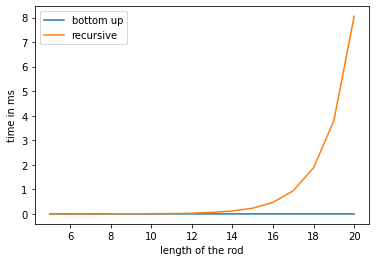

In [20]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,21):

  p = cutrod_instance_generator(n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import cutRodBottomUp", stmt=f"cutRodBottomUp({p},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import cutRodRecursive", stmt=f"cutRodRecursive({p},{n})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["bottom up", "recursive"])

plt.xlabel('length of the rod')
plt.ylabel('time in ms')
plt.show()

###Analisis

Como se puede observar el metodo **recursivo** y el metodo **bottom up**, a largo de su ejecucion entre los valores de $[1,12]$ se mantienen bastante similares correspecto a su tiempo de ejecucion, pero a partir de los valores entre $[13,20]$ vemos un crecimiento exponencial del tiempo de ejecucion del metodo recusivo.

Desconozco el motivo de tal comportamiento, tampoco puedo proveer alguna idea o idea de donde podria encontrase la razon de tal comportamiento.

##5.2. Cantidad de sub-arreglos

A continuacion se experimentara con la cantidad de sub-problemas que debe resolver la implementacion **bottom up** a lo largo de su ejecucion.

* Cantidad de sub-problemas (eje $Y$)
* Longitud de la varilla (eje $X$)
* Cantidad de sub-problemas basado en la longitud de la varilla (grafica azul)

para un problema de tamaño $[5,50]$

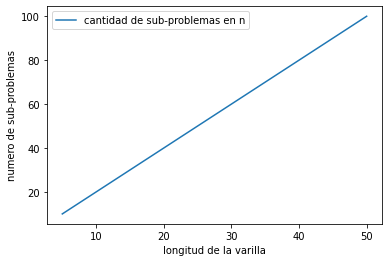

In [ ]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y=[]

for n in range(5,51):
  p = cutrod_instance_generator(n)

  b,counter = cutRodBottomUp(p,n)
  y.append(counter)

plt.plot(x,y)
plt.legend(["cantidad de sub-problemas en n"])

plt.xlabel('longitud de la varilla')
plt.ylabel('numero de sub-problemas')
plt.show()

###Analisis

como se puede apreciar en la grafica, el crecimiento de la cantidad de sub-problemas en relacion de la longitud de la varilla es constante a largo de su ejecucion.

#6. Anexos

##6.1. Codigo para generar lista de precios

Este codigo es el que crea las listas de precios necesarias para hacer los experimentos y la demostracion de mostrada en el **verbose**.

In [19]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A